In [1082]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [1083]:
df_covid=pd.read_csv("C:\PujaFiles\Excel data for practice\Covid\covid_india.csv")
df_covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30-01-2020,6:00 PM,Kerala,1,0,0,0,1
1,2,31-01-2020,6:00 PM,Kerala,1,0,0,0,1
2,3,01-02-2020,6:00 PM,Kerala,2,0,0,0,2
3,4,02-02-2020,6:00 PM,Kerala,3,0,0,0,3
4,5,03-02-2020,6:00 PM,Kerala,3,0,0,0,3


In [1084]:
import datetime as dt
df_covid['Date'] = pd.to_datetime(df_covid['Date'])
df_covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-01-02,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-03-02,6:00 PM,Kerala,3,0,0,0,3


In [1085]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       18110 non-null  int64         
 1   Date                      18110 non-null  datetime64[ns]
 2   Time                      18110 non-null  object        
 3   State/UnionTerritory      18110 non-null  object        
 4   ConfirmedIndianNational   18110 non-null  object        
 5   ConfirmedForeignNational  18110 non-null  object        
 6   Cured                     18110 non-null  int64         
 7   Deaths                    18110 non-null  int64         
 8   Confirmed                 18110 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1.2+ MB


In [1086]:
df_covid.drop(['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational'],axis=1,inplace=True)

In [1087]:
df_covid.head(5)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-01-02,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-03-02,Kerala,0,0,3


In [1088]:
df_covid['ActiveCases']=df_covid['Confirmed'] -(df_covid['Cured']+df_covid['Deaths'])
df_covid.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,ActiveCases
18105,2021-11-08,Telangana,638410,3831,650353,8112
18106,2021-11-08,Tripura,77811,773,80660,2076
18107,2021-11-08,Uttarakhand,334650,7368,342462,444
18108,2021-11-08,Uttar Pradesh,1685492,22775,1708812,545
18109,2021-11-08,West Bengal,1506532,18252,1534999,10215


In [1089]:
statewise=pd.pivot_table(df_covid, values=['Confirmed','Deaths','Cured'],index=['State/UnionTerritory'],aggfunc=max)
#a=df_covid.groupby('State/UnionTerritory') [['Confirmed','Deaths','Cured']].max()

In [1090]:
statewise['Rocovery_rate']=(statewise['Cured']*100) / statewise['Confirmed']

In [1091]:
statewise['Mortality_rate']=(statewise['Deaths']*100) / statewise['Confirmed']
statewise.head()

,Confirmed,Cured,Deaths,Rocovery_rate,Mortality_rate
State/UnionTerritory,,,,,
Andaman and Nicobar Islands,7548,7412,129,98.198198,1.709062
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Arunachal Pradesh,50605,47821,248,94.498567,0.490070
Assam,576149,559684,5420,97.142232,0.940729
Bihar,725279,715352,9646,98.631285,1.329971


In [1092]:
statewise=statewise.sort_values(by='Confirmed',ascending=False)
statewise.tail()

,Confirmed,Cured,Deaths,Rocovery_rate,Mortality_rate
State/UnionTerritory,,,,,
Lakshadweep,10263,10165,51,99.045114,0.496931
Cases being reassigned to states,9265,0,0,0.000000,0.000000
Andaman and Nicobar Islands,7548,7412,129,98.198198,1.709062
Unassigned,77,0,0,0.000000,0.000000
Daman & Diu,2,0,0,0.000000,0.000000


In [1093]:
statewise.style.background_gradient(cmap='cubehelix')

,Confirmed,Cured,Deaths,Rocovery_rate,Mortality_rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056
Delhi,1436852,1411280,25068,98.220276,1.744647
Chhattisgarh,1003356,988189,13544,98.488373,1.349870


# Display  Active Cases of top 10 States


In [1094]:
top10_ActiveCases=df_covid.groupby('State/UnionTerritory').max() [['ActiveCases']].nlargest(10,'ActiveCases')
top10_ActiveCases

,ActiveCases
State/UnionTerritory,
Maharashtra,701614
Karnataka,605515
Kerala,445692
Tamil Nadu,313048
Uttar Pradesh,310783
Rajasthan,212753
Andhra Pradesh,211554
Gujarat,148297
West Bengal,132181


Text(0.5, 1.0, 'Top 10  States with most Active Cases in India')

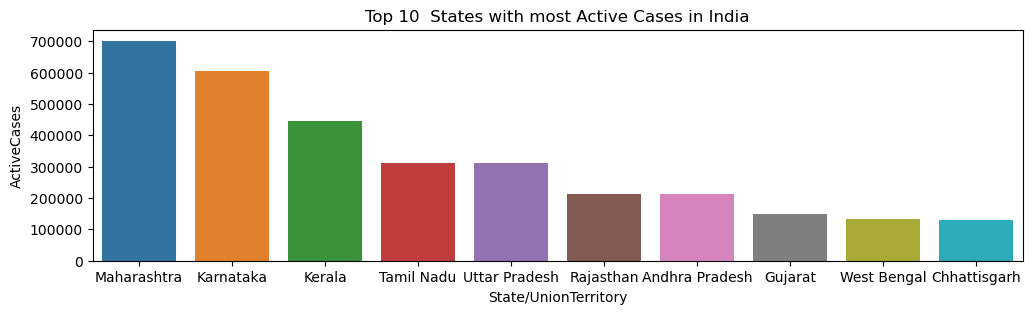

In [1095]:
plt.figure(figsize=(12,3))
ax=sns.barplot(x=top10_ActiveCases.index,y='ActiveCases',data=top10_ActiveCases)
plt.title("Top 10  States with most Active Cases in India")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10)

# Top 10 States with highest Death

In [1096]:
top10_Death=df_covid.groupby('State/UnionTerritory').max() [['Deaths']].nlargest(10,'Deaths')
top10_Death

,Deaths
State/UnionTerritory,
Maharashtra,134201
Karnataka,36848
Tamil Nadu,34367
Delhi,25068
Uttar Pradesh,22775
West Bengal,18252
Kerala,18004
Punjab,16322
Andhra Pradesh,13564


Text(0.5, 1.0, 'Top 10 States with highest Death')

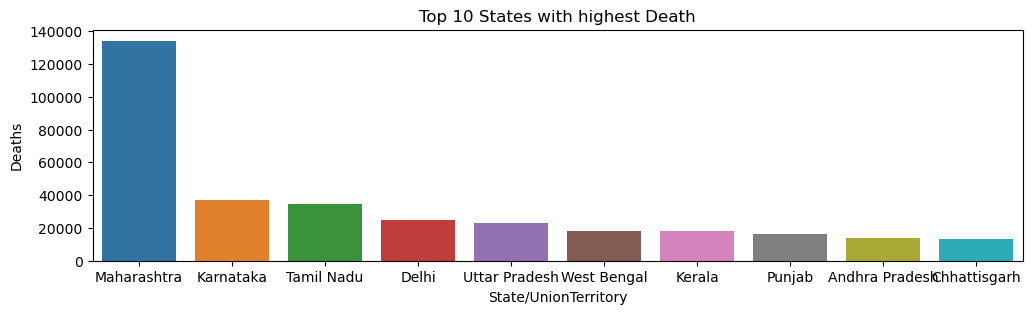

In [1097]:
plt.figure(figsize=(12,3))
ax=sns.barplot(x=top10_Death.index, y='Deaths',data=top10_Death)
plt.title("Top 10 States with highest Death")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10)

# Top 5 Affected States

In [1098]:
top5=df_covid.groupby('State/UnionTerritory').max() [['ActiveCases']].nlargest(5,'ActiveCases')
top5

,ActiveCases
State/UnionTerritory,
Maharashtra,701614
Karnataka,605515
Kerala,445692
Tamil Nadu,313048
Uttar Pradesh,310783


In [1099]:
df=df_covid[ df_covid['State/UnionTerritory'].isin(['Maharashtra','Karnataka','Kerala','Tamil Nadu','Uttar Pradesh']) ]
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,ActiveCases
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-01-02,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-03-02,Kerala,0,0,3,3


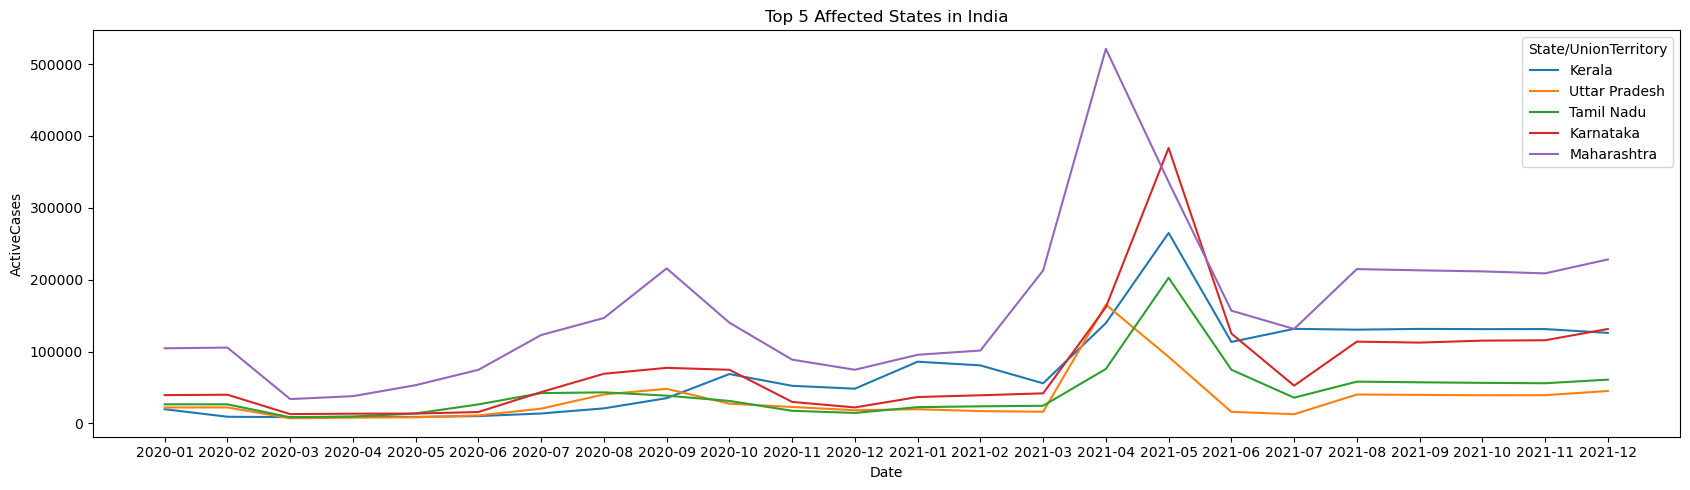

In [1100]:
plt.figure(figsize=(17,5))
sns.lineplot(data=df, x = pd.to_datetime(df['Date']).dt.strftime('%Y-%m') 
             ,y='ActiveCases',hue='State/UnionTerritory',ci=None)
plt.title("Top 5 Affected States in India")
plt.tight_layout()
plt.show()

In [1101]:
year_2021 = df[df['Date'].dt.year == 2021]

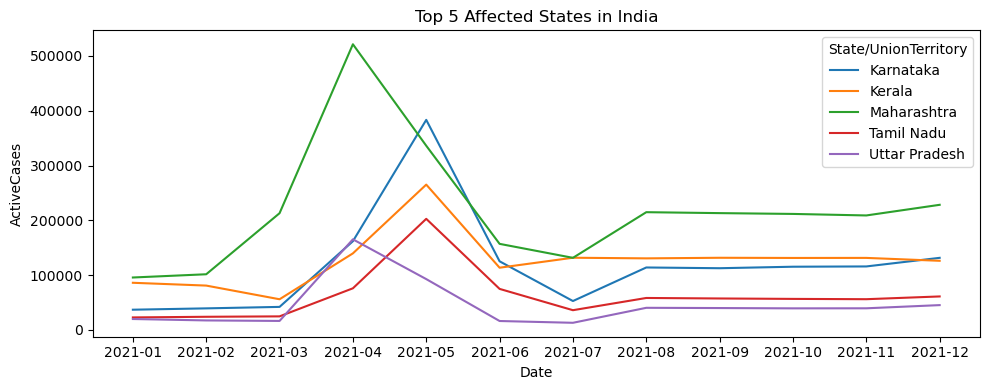

In [1102]:
plt.figure(figsize=(10,4))
sns.lineplot(data=year_2021, x = pd.to_datetime(year_2021['Date']).dt.strftime('%Y-%m') 
             ,y='ActiveCases',hue='State/UnionTerritory', ci=None)
plt.title("Top 5 Affected States in India")
plt.tight_layout()
plt.show()

# sum of Deaths from Maharastra

In [1103]:
df_covid.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,ActiveCases
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-01-02,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-03-02,Kerala,0,0,3,3


In [1104]:
df_covid[df_covid['State/UnionTerritory']=='Maharashtra'] ['Deaths'].sum()

23868185

# Sum of Deaths from Maharastra and Kerala

In [1105]:
df_covid[ (df_covid['State/UnionTerritory'].isin(['Maharashtra','Kerala']) )]['Deaths'].sum()

25756362

# Total Active Cases in 2021 from Kerala

In [1106]:
df_covid[(df_covid['Date'].dt.year == 2021)& (df_covid['State/UnionTerritory']=='Kerala')] ['ActiveCases'].sum()

28134303

# Top 10 Most Cured States

In [1107]:
top10_cured=df_covid.groupby('State/UnionTerritory').sum() [['Cured']].nlargest(10,'Cured')
top10_cured

,Cured
State/UnionTerritory,
Maharashtra,1024765950
Karnataka,444665851
Kerala,420174235
Tamil Nadu,404095807
Andhra Pradesh,370426530
Uttar Pradesh,291479351
Delhi,273419887
West Bengal,247515102
Chhattisgarh,151609364


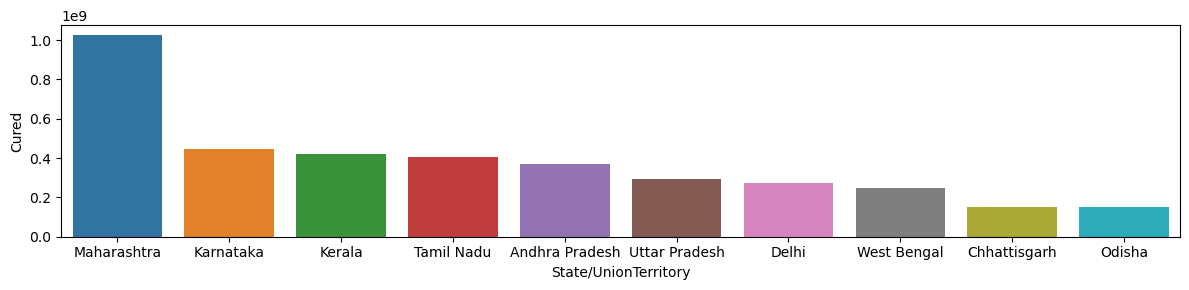

In [1108]:
plt.figure(figsize=(12,3))
ax=sns.barplot(x=top10_cured.index, y='Cured',data=top10_cured)
plt.tight_layout()

In [1109]:
df_covid.head(2)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,ActiveCases
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1


In [1110]:
#########################################################################################################################

# Dataset: covid vaccine

In [1111]:
df_vaccine=pd.read_csv("C:\PujaFiles\Excel data for practice\Covid\covid_vaccine_statewise.csv")

In [1112]:
df_vaccine.rename(columns={'Updated On':'Vaccine_Date','Total Individuals Vaccinated':'Total'},inplace=True)

In [1113]:
df_vaccine.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [1114]:
df_vaccine.isnull().sum()

Vaccine_Date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [1115]:
vaccination=df_vaccine.copy()
vaccination.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [1116]:
vaccination.drop(columns=['Sputnik V (Doses Administered)','AEFI','18-44 Years (Doses Administered)','45-60 Years (Doses Administered)',
                    '60+ Years (Doses Administered)','18-44 Years(Individuals Vaccinated)','45-60 Years(Individuals Vaccinated)',
                 '60+ Years(Individuals Vaccinated)'],inplace=True)

In [1117]:
vaccination.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,98111.0,153145.0,24.0,251280.0


# Male Vs Female Vaccination

In [1118]:
male=vaccination['Male(Individuals Vaccinated)'].sum()
female=vaccination['Female(Individuals Vaccinated)'].sum()
male,female

(7138698858.0, 6321628736.0)

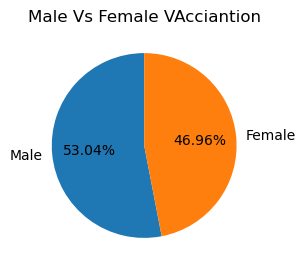

In [1119]:
plt.figure(figsize=(5,3))
plt.pie([male,female],labels=['Male','Female'],autopct='%0.2f%%',startangle=90)
## autopct='%0.2f%%': Show data in percentage for with 2 decimal point
plt.title("Male Vs Female VAcciantion")
plt.show()

In [1120]:
vaccination=vaccination[~(vaccination['State']=='India')]
vaccination.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,124.0


In [1121]:
vaccination.shape

(7633, 16)

# Top 5 Most Vaccinated State

In [1122]:
top5_vaccine=vaccination.groupby('State')['Total'].sum().nlargest(5).to_frame()
top5_vaccine

,Total
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08


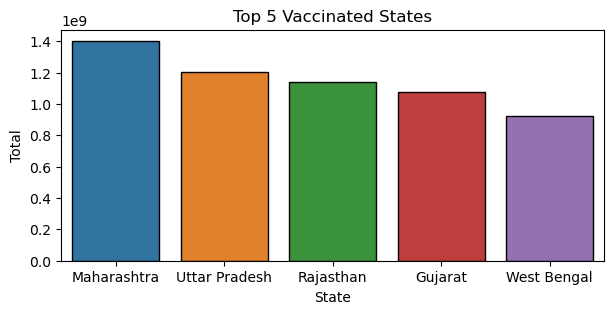

In [1123]:
plt.figure(figsize=(7,3))
sns.barplot(x=top5_vaccine.index,y='Total',data=top5_vaccine,ec='black')
plt.title("Top 5 Vaccinated States")
plt.show()